# Length Matters:  The Value of a Longer Chain 
Derives figures and shows equivalence between two known measures. 

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [8]:
from openpyxl import load_workbook
import pandas as pd
#zero entries in X convert to 1 so that we can invert the diagonal matrix X
wb = load_workbook(filename='D:\CloudStation\Data\WIOD\Cwiot02.xlsx', 
                   read_only=True)
ws = wb['WIOT_2002']

#helper function to extract cells from sheet
def excel_extract(sheet, start_cell, end_cell):
    data_rows = []
    for row in ws[start_cell:end_cell]:
        data_cols = []
        for cell in row:
            data_cols.append(cell.value)
        data_rows.append(data_cols)
    df = pd.DataFrame(data_rows)
    return df


def VC_Length(Z,X):
    '''
    inputs Z and X matrix 
    outputs L = Length, A= A coefficient matrix, B = Inverse matrix
    '''
    shape=Z.shape[0]
    I = np.identity(shape)
    #print("Now Calculate A matrix")
    hat_X = np.diagflat(X)
    A = Z*np.linalg.inv(hat_X)
    #print("now calculate Inverse Matrix (I-A)^-1")
    B = np.linalg.inv(I-A)
    #print("now sum along the column to calculate the upstream length")
    L = np.sum(B, axis=0)

    return L , A , B


## Show Wang and Antras are numerically equivalent
The calculations in Wang make large steps for those who are not familiar with the calculation and the notation is different between Wang and Antras.  Thus I felt it necessary to show equivalence numerically in this example, which ends in a plot of a 45 degree line, showing equivalence.  

Variable definitions and descriptions can be found in the paper "Length Matters:  The Value of a Longer Value Chain"

In [9]:
# Transform into dataframe
X = np.matrix(excel_extract(ws, 'BKG7', 'BKG1441'))
Z = np.matrix(excel_extract(ws, 'E7', 'BCI1441'))
V = np.matrix(excel_extract(ws, 'E1447', 'BCI1447'))
Xi = np.matrix(excel_extract(ws, 'E1449', 'BCI1449'))

In [10]:
shape=Z.shape[0]
I = np.identity(shape)
print("Now Calculate B matrix B = X^-1 Z ")
hat_Xi = np.diagflat(np.transpose(Xi))
B = np.linalg.inv(hat_Xi)*Z
#print(B)

print("now calculate Ghosh Inverse Matrix W = (I-A)^-1")
W = np.linalg.inv(I-B)
#print(W)

print("Now Calculate A matrix A = Z X^-1  ")
hat_X = np.diagflat(X)
A = Z*np.linalg.inv(hat_X)
#print(A)

print("now calculate Leontief Inverse Matrix L = (I-A)^-1")
L = np.linalg.inv(I-A)
#print(L)

print("now sum up the column to calculate the upstream length")
Zhi = np.sum(L, axis=0)
print(Upstream_Length_Zhi)

one = np.reshape(np.ones(shape), [1,shape])
print("Now calculate it according to Antras and Chor: L = VaWWX^-1")
Antras = Xi*W*np.linalg.inv(hat_Xi)

Now Calculate B matrix B = X^-1 Z 
now calculate Ghosh Inverse Matrix W = (I-A)^-1
Now Calculate A matrix A = Z X^-1  
now calculate Leontief Inverse Matrix L = (I-A)^-1
now sum up the column to calculate the upstream length
[[1.58415842]
 [1.38613861]
 [1.75346535]]
Now calculate it according to Antras and Chor: L = VaWWX^-1


In [29]:
print(Antras.shape)
X = np.array(np.reshape(X, [1435,]))
Xi = np.array(np.reshape(Xi, [1435,]))
print(Xi.shape)

(1, 1435)
(1435,)


(1, 1435)

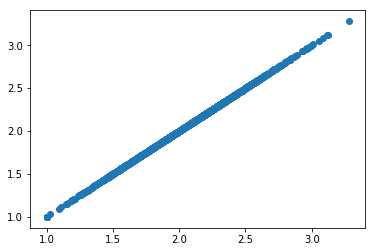

In [30]:
#
Zhi2 = np.sum(L, axis=0)
Antras = np.array(np.reshape(Antras, [1435,]))
Zhi = np.array(np.reshape(Zhi, [1435,]))
Zhi2 = np.array(np.reshape(Zhi2, [1435,]))
Zhi.shape
plt.scatter(Zhi2,Antras)
#plt.scatter(X, Xi)

## plot matrices for different countries

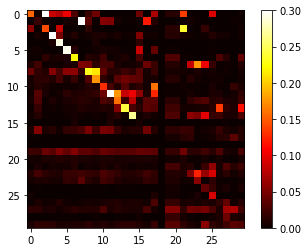

Number of Industries in China =  30


In [66]:
'''
Get matrix A for China, Canada and Ireland for comparison, note length is total length.  I use domestic length.  The calculation
is included here for illustrative purposes only. 
'''
R = VC_Length(Z,X)

tl_chn, a_chn, b_chn = R[0][210:240, 210:240], R[1][210:240, 210:240], R[2][210:240, 210:240]
z_chn = Z[210:240, 210:240]

tl,can, a_can, b_can  =R[0][180:210, 180:210], R[1][180:210, 180:210], R[2][180:210, 180:210]
z_can = Z[180:210, 180:210]

a_irl = R[1][700:730, 700:730]
z = Z[204:234, 204:234]


print("Number of Industries in China = ", a_chn.shape[1])

In [162]:
#Get Domestic Value Chain Length from Zhi, which eliminated double counting
Length = pd.read_csv('D:\CloudStation\Data\RIGVC\GVC.csv', delimiter='\t')
l_chn= Length.loc[(data['Country']=='CHN') & (data['Year']==2002)]['PLv_D'][0:30].values
l_can= Length.loc[(data['Country']=='CAN') & (data['Year']==2002)]['PLv_D'][0:30].values
l_irl= Length.loc[(data['Country']=='IRL') & (data['Year']==2002)]['PLv_D'][0:30].values

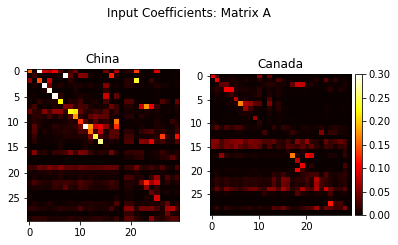

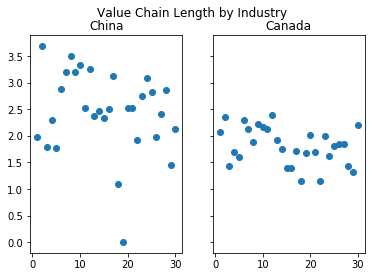

In [164]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

fig, (ax11, ax12) = plt.subplots(nrows=1, ncols=2)
fig.suptitle('Input Coefficients: Matrix A')
ax11.set_title('China')
im1 = ax11.imshow(a_chn, cmap='hot', interpolation='nearest', vmin=0, vmax=.3)
ax12.set_title('Canada')
im2 = ax12.imshow(a_can, cmap='hot', interpolation='nearest', vmin=0, vmax=.3)
divider1 = make_axes_locatable(ax12)
cax1 = divider1.append_axes("right", size="5%", pad=0.05)
cbar1 = plt.colorbar(im1, cax=cax1)
plt.show()

fig, (ax11, ax12) = plt.subplots(nrows=1, ncols=2, sharey=True)
fig.suptitle('Value Chain Length by Industry')
ax11.set_title('China')
im1 = ax11.scatter(industries, l_chn)
ax12.set_title('Canada')
im1 = ax12.scatter(industries, l_can)
plt.show()